In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(10))

(619040, 7)
              date    open    high     low   close   volume Name
178435  24-12-2015   64.45   64.84   64.30   64.56   623103  DRI
451487  26-06-2013   95.12   96.14   94.77   95.53  1235225   PH
86915   18-09-2017  429.39  431.71  428.55  429.44   456054  BLK
204783  05-05-2014   46.06   46.70   45.99   46.62  1285100   ES
596496  16-03-2016   67.94   68.34   67.25   67.99  8218029  WMT
238002  02-11-2015  143.47  147.40  142.85  147.40   528504  FRT
237151  16-06-2017   26.93   27.36   26.83   27.12  3581799  FOX
171455  09-04-2013   69.70   70.55   69.37   70.44  1169385  DLR
22920   19-02-2014  205.44  213.11  203.59  210.56  8786861  AGN
356112  26-09-2017   98.11  100.10   97.99   99.76  3017387  LYB


In [ ]:
data['date'] = pd.to_datetime(data['date'],format ='mixed')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date'],format='mixed')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


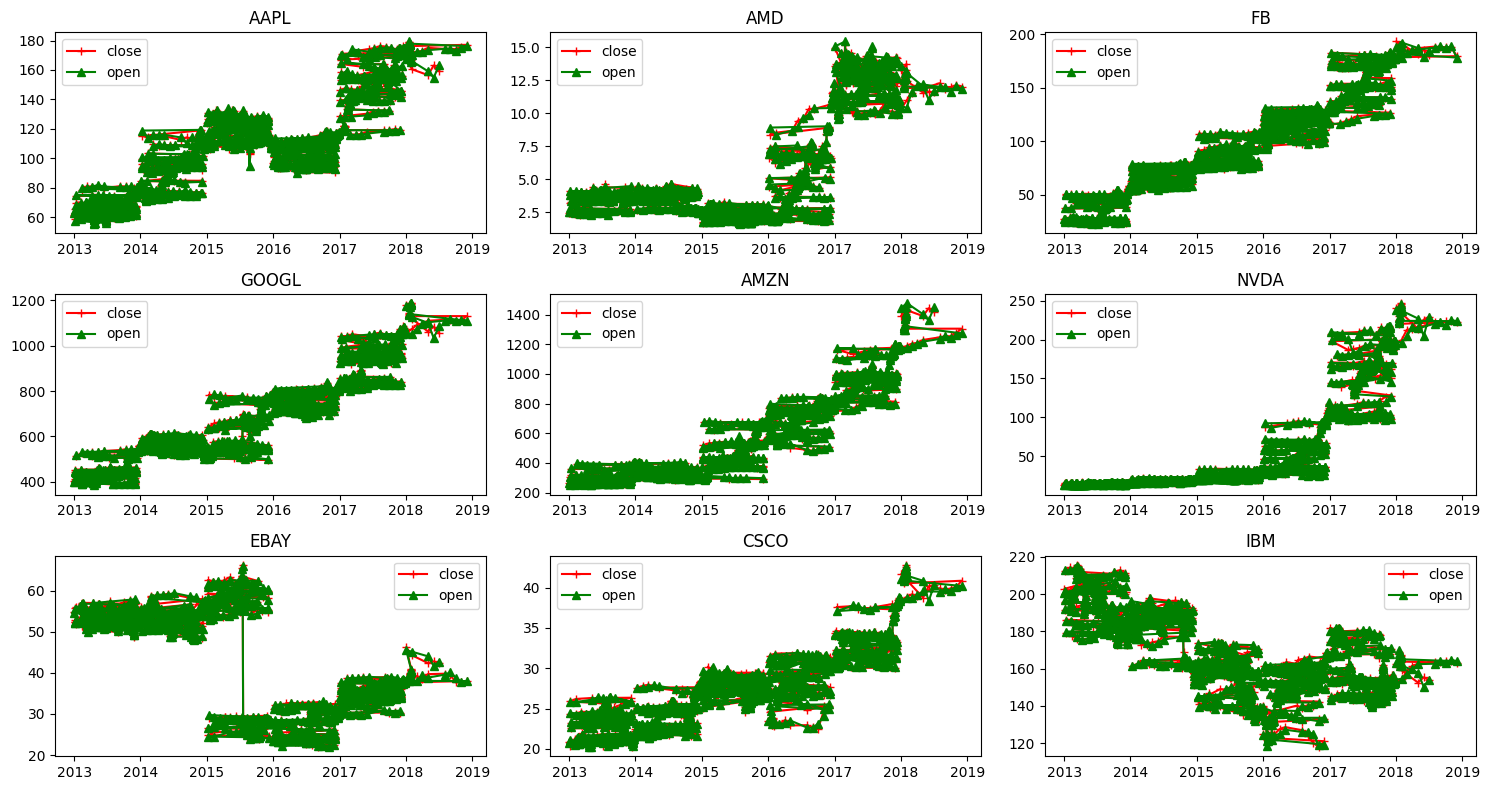

In [ ]:
plt.figure(figsize=(15, 8))
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
	plt.title(company)
	plt.legend()
	plt.tight_layout()

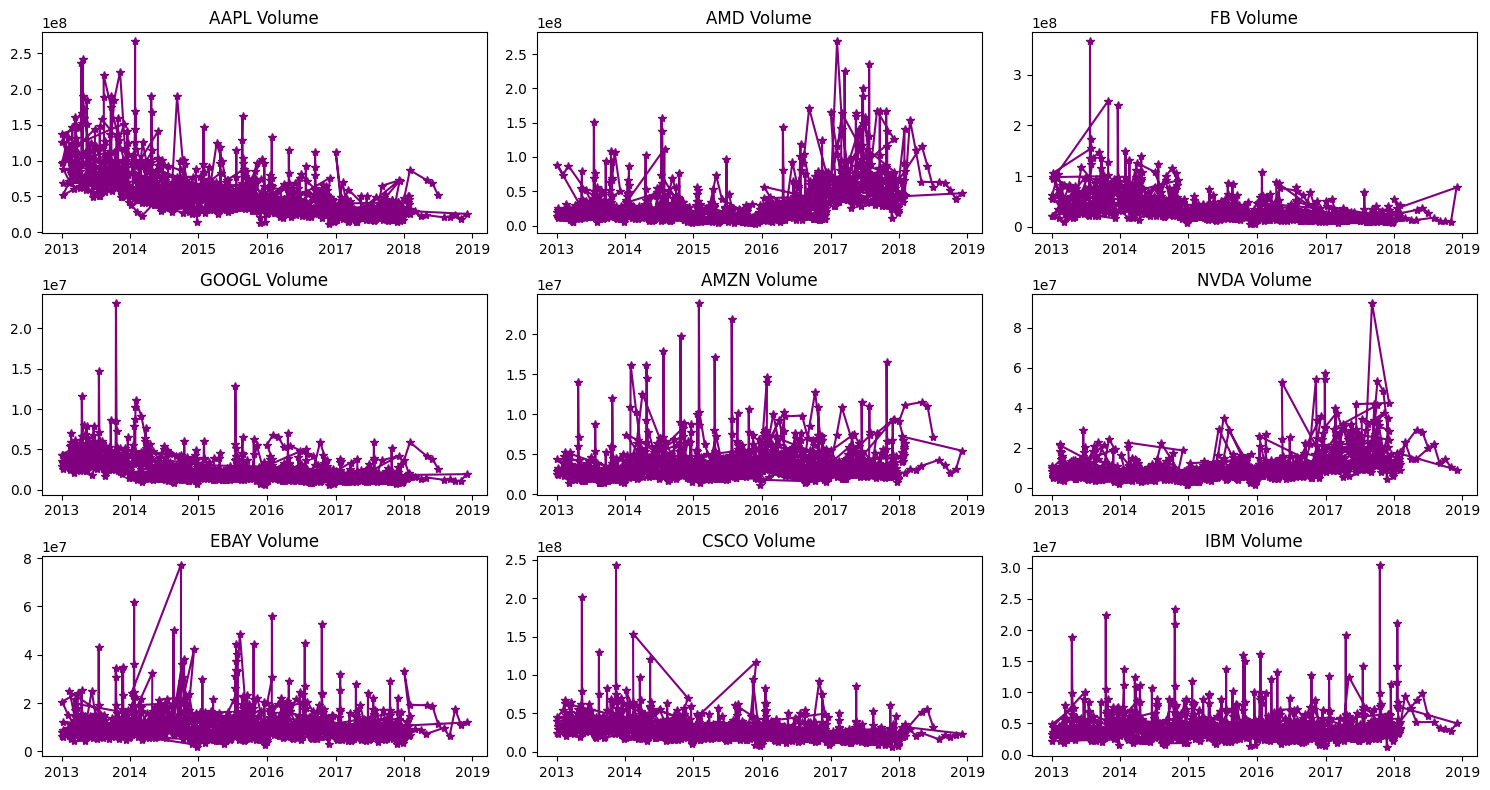

In [ ]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

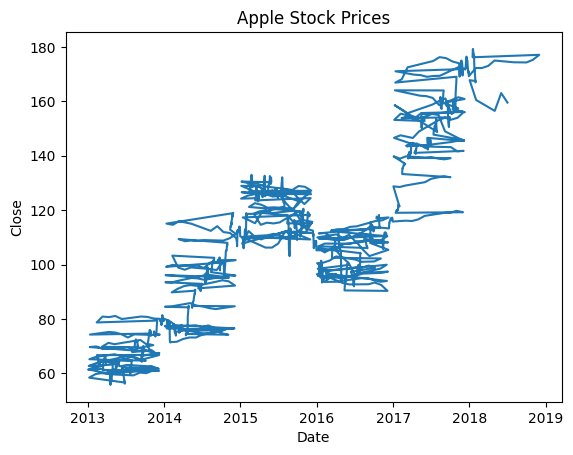

In [ ]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [ ]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
            loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=100)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0785
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0105
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0101
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0079
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0082
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0073
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0076
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0068
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0078
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0076
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0071
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0063
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0058
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0053
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - 

In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step
MSE 36.25203409953379
RMSE 6.020966209798373


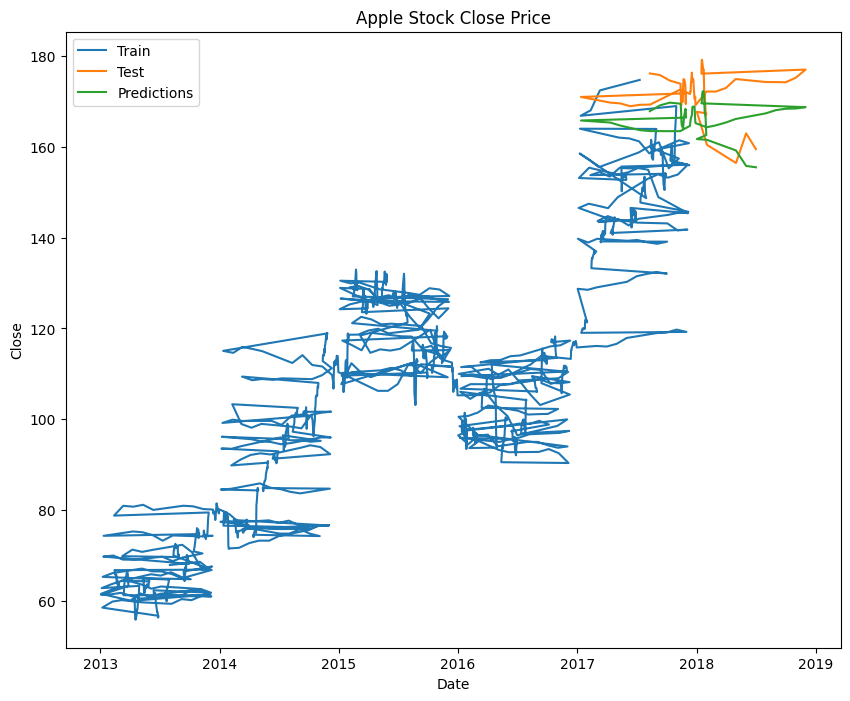

In [ ]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])